<a href="https://colab.research.google.com/github/muhamadr03/Praktikum-ML/blob/main/Praktikum_3/regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Praktikum ML/Praktikum 3/data'

In [ ]:
import pandas as pd
df = pd.read_csv(path + '/socr.csv', sep=',')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
## konversi data menjadi satuan CM dan KG
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
      .rename(columns={"Height(Inches)": "tinggi_cm",
                     "Weight(Pounds)": "berat_kg"})
      .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,
        berat_kg=lambda d: d["berat_kg"] * 0.45359237
      )
      .round({"tinggi_cm": 2, "berat_kg": 2})
).copy()
df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


In [ ]:
# membagi dataset
from sklearn.model_selection import train_test_split
X = df1[["tinggi_cm"]]
y = df1["berat_kg"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Pemodelan data dengan data training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# prediksi model dengan data testing
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Koefisien (kg per cm):", model.coef_[0])
print("Intersep (kg):", model.intercept_)
print("R2 (Test):", r2)
print("MAE (kg)", mean_absolute_error(y_test,y_pred))
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("MSE (kg)",mse)
print("RMSE (kg)",rmse)

Koefisien (kg per cm): 0.5484528537924076
Intersep (kg): -37.07361066572892
R2 (Test): 0.2605732097944444
MAE (kg) 3.644517249731769
MSE (kg) 21.08700813352966
RMSE (kg) 4.59205924760664


In [ ]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Persamaan: y = {slope:.3f} * x +{intercept:.3f}")

Persamaan: y = 0.548 * x +-37.074


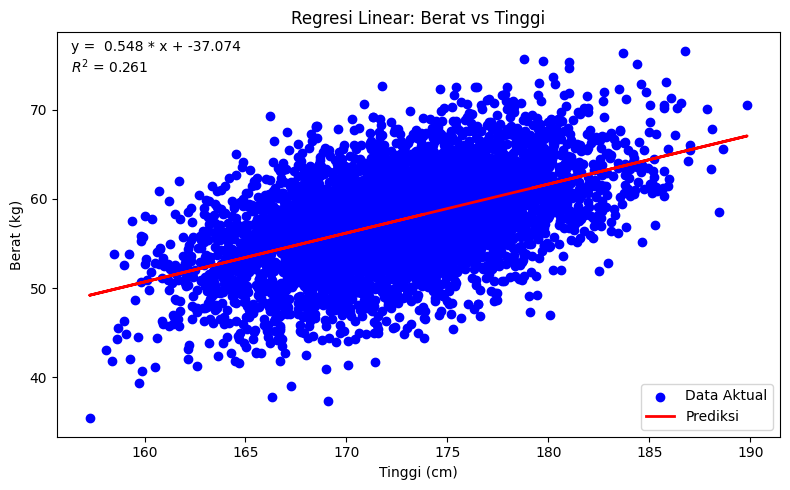

In [ ]:
# Plot regresi
import matplotlib.pyplot as plt
# Plot data scatter
plt.figure(figsize=(8, 5))

plt.scatter(X_test, y_test, color="blue", label="Data Aktual")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")
plt.xlabel("Tinggi (cm)")
plt.ylabel("Berat (kg)")
plt.title("Regresi Linear: Berat vs Tinggi")
plt.text(
      0.02, 0.98,
      f"y = {slope: .3f} * x + {intercept: .3f}\n$R^2$ = {r2 :.3f}",
      transform=plt.gca().transAxes, va="top"
)
plt.legend()
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# --- Asumsi data awal (ganti dengan data aktual Anda) ---
# Misalnya, kita membuat data dummy untuk demonstrasi
np.random.seed(42)
tinggi_cm = np.random.normal(165, 10, 100) # Tinggi dalam cm
berat_kg = 0.5 * tinggi_cm - 20 + np.random.normal(0, 5, 100) # Berat dalam kg
data = pd.DataFrame({'tinggi_cm': tinggi_cm, 'berat_kg': berat_kg})

# Memisahkan fitur (X) dan target (y)
X = data[['tinggi_cm']]
y = data['berat_kg']

# Memisahkan data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# --- Bagian kode yang Anda minta ---

y_pred_test = model.predict(X_test)

# Buat tabel hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test,
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error/aktual|)), dibatasi 0-100
denom = hasil["Berat aktual (kg)"].replace(0, np.nan) # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,159.817298,62.321011,60.348235,-1.972776,96.834493
1,171.116763,66.719650,65.198582,-1.521068,97.720210
2,168.613956,59.859406,64.124241,4.264835,92.875247
3,157.801558,62.809893,59.482969,-3.326924,94.703185
4,150.214780,56.406804,56.226310,-0.180494,99.680014
5,166.968612,57.329985,63.417969,6.087985,89.380802
6,165.675282,69.851613,62.862801,-6.988811,89.994775
7,162.803281,64.529977,61.629982,-2.899995,95.505972
8,160.365823,50.589055,60.583692,9.994636,80.243481
9,169.967142,57.906717,64.705102,6.798385,88.259765


In [5]:
df_dataTI = pd.read_csv('/content/drive/MyDrive/Praktikum ML/Praktikum 3/data/contoh_data.csv')
df_dataTI.head()

,no,nama,tinggi_cm,actual_berat
0,1,Rafa,168,58.5
1,2,Tiara,162,78.2
2,3,Tiara,155,52.7
3,4,Keyla,160,70.3
4,5,Bani,183,65.8


In [6]:
X_testing = df_dataTI[['tinggi_cm']]
X_testing

,tinggi_cm
0,168
1,162
2,155
3,160
4,183


In [11]:
df_dataTI['prediksi_kg'] = model.predict(X_testing)
df_dataTI['selisih_kg'] = df_dataTI['actual_berat'] - df_dataTI['prediksi_kg']
df_dataTI['akurasi_%'] = 100 - (df_dataTI['selisih_kg'] / df_dataTI['actual_berat']).abs() * 100


df_ti2024 = df_dataTI.drop(columns='berat_kg', errors='ignore')[
    ['no','nama','tinggi_cm','actual_berat','prediksi_kg','selisih_kg','akurasi_%']
]

df_ti2024

,no,nama,tinggi_cm,actual_berat,prediksi_kg,selisih_kg,akurasi_%
0,1,Rafa,168,58.5,63.860697,-5.360697,90.836415
1,2,Tiara,162,78.2,61.285170,16.914830,78.369782
2,3,Tiara,155,52.7,58.280388,-5.580388,89.411029
3,4,Keyla,160,70.3,60.426661,9.873339,85.955421
4,5,Bani,183,65.8,70.299516,-4.499516,93.161830


In [13]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Praktikum ML/Praktikum 3/data/stunting_wasting_dataset.csv')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [14]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [15]:
df1 = df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]] \
    .rename(columns={"Jenis Kelamin":"jk", "Umur (bulan)":"umur_bln",
                     "Tinggi Badan (cm)":"tinggi_cm", "Berat Badan (kg)": "berat_kg"}).copy()

## Laki-laki: 1, Perempuan: 0
df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df1.head()

,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4
